In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


ANIKET KUMAR

Topic : Exploratory Data Analysis (EDA) - Terrorism
globalterrorismdb_0718dist.csv
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [8]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [9]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [10]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [11]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
data.shape

(9656, 18)

In [13]:
data.info

<bound method DataFrame.info of       Year  Month  day             Country         State  \
0     1970      7    2  Dominican Republic           NaN   
1     1970      0    0              Mexico       Federal   
2     1970      1    0         Philippines        Tarlac   
3     1970      1    0              Greece        Attica   
4     1970      1    0               Japan       Fukouka   
...    ...    ...  ...                 ...           ...   
9651  1979     11   13           Argentina  Buenos Aires   
9652  1979     11   13            Colombia       Unknown   
9653  1979     11   13            Colombia        Tolima   
9654  1979     11   13            Portugal        Lisbon   
9655  1979     11   14                 NaN           NaN   

                           Region           City   latitude   longitude  \
0     Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                   North America    Mexico city  19.371887  -99.086624   
2                  Sou

In [14]:
data.isnull().sum()

Year             0
Month            0
day              0
Country          1
State           39
Region           1
City             1
latitude       303
longitude      303
Attacktype       1
kill          1159
Wound         2442
target1         74
summary       8791
Group            1
Targettype       1
Weapon           1
motive        9055
dtype: int64

In [15]:
data.isna().sum()

Year             0
Month            0
day              0
Country          1
State           39
Region           1
City             1
latitude       303
longitude      303
Attacktype       1
kill          1159
Wound         2442
target1         74
summary       8791
Group            1
Targettype       1
Weapon           1
motive        9055
dtype: int64

In [16]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,9656.000000,9656.000000,9656.000000,9353.000000,9353.000000,8497.000000,7214.000000
mean,1975.971935,6.282001,15.164561,33.155350,-20.829568,0.815464,1.085805
std,2.890571,3.368098,9.022129,22.172133,53.255134,5.748584,7.200481
min,1970.000000,0.000000,0.000000,-45.867889,-157.818968,0.000000,0.000000
25%,1974.000000,3.000000,7.000000,25.699073,-73.931351,0.000000,0.000000
50%,1977.000000,6.000000,15.000000,40.697132,-5.956210,0.000000,0.000000
75%,1978.000000,9.000000,23.000000,46.669097,11.119059,1.000000,0.000000
max,1979.000000,12.000000,31.000000,64.837778,172.636225,422.000000,285.000000


In [17]:
data.head

<bound method NDFrame.head of       Year  Month  day             Country         State  \
0     1970      7    2  Dominican Republic           NaN   
1     1970      0    0              Mexico       Federal   
2     1970      1    0         Philippines        Tarlac   
3     1970      1    0              Greece        Attica   
4     1970      1    0               Japan       Fukouka   
...    ...    ...  ...                 ...           ...   
9651  1979     11   13           Argentina  Buenos Aires   
9652  1979     11   13            Colombia       Unknown   
9653  1979     11   13            Colombia        Tolima   
9654  1979     11   13            Portugal        Lisbon   
9655  1979     11   14                 NaN           NaN   

                           Region           City   latitude   longitude  \
0     Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                   North America    Mexico city  19.371887  -99.086624   
2                  South

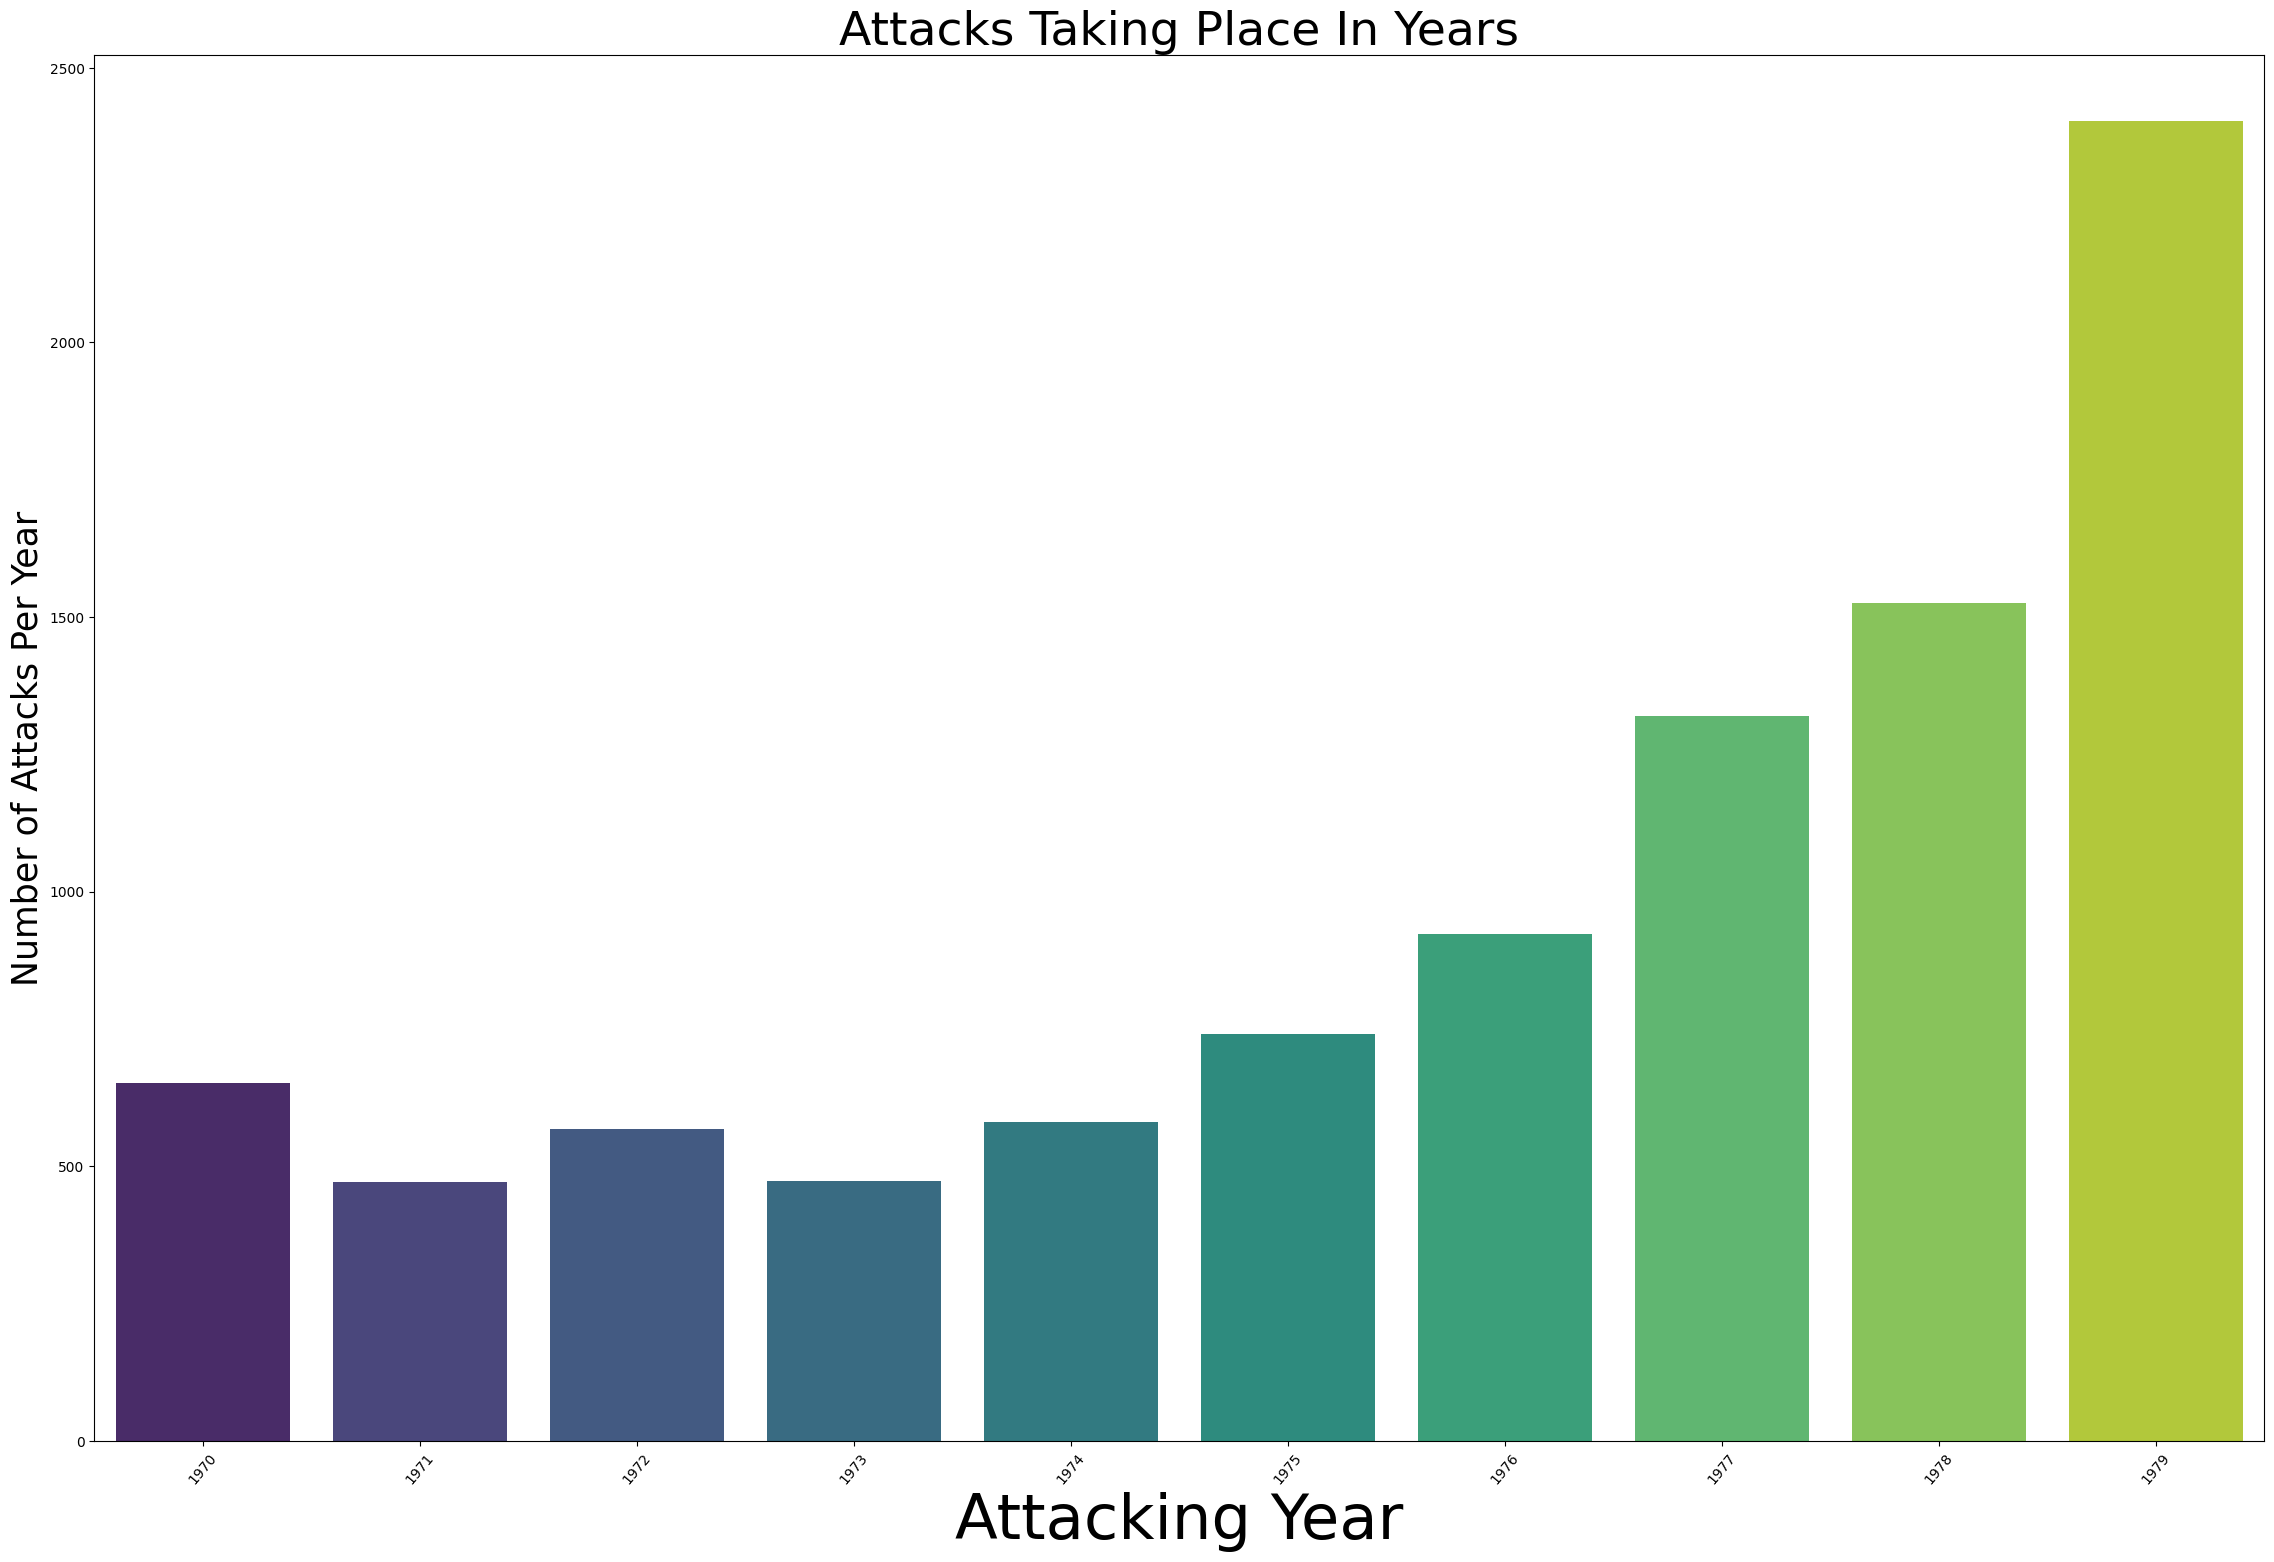

In [18]:
year=data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (28,18))
sns.barplot(x = year,y = years_count,palette = "viridis")
plt.xticks(rotation = 50)
plt.title('Attacks Taking Place In Years',fontsize=34)
plt.xlabel('Attacking Year',fontsize=45)
plt.ylabel('Number of Attacks Per Year',fontsize=25)

plt.show()

<Axes: >

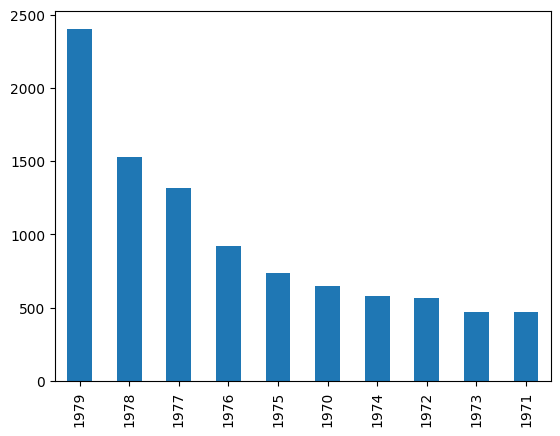

In [19]:
data['Year'].value_counts().plot(kind='bar')

Top 5 years with most Attack happened from 1971 to 2014

* 2014
* 2015
* 2016
* 2013
* 2017

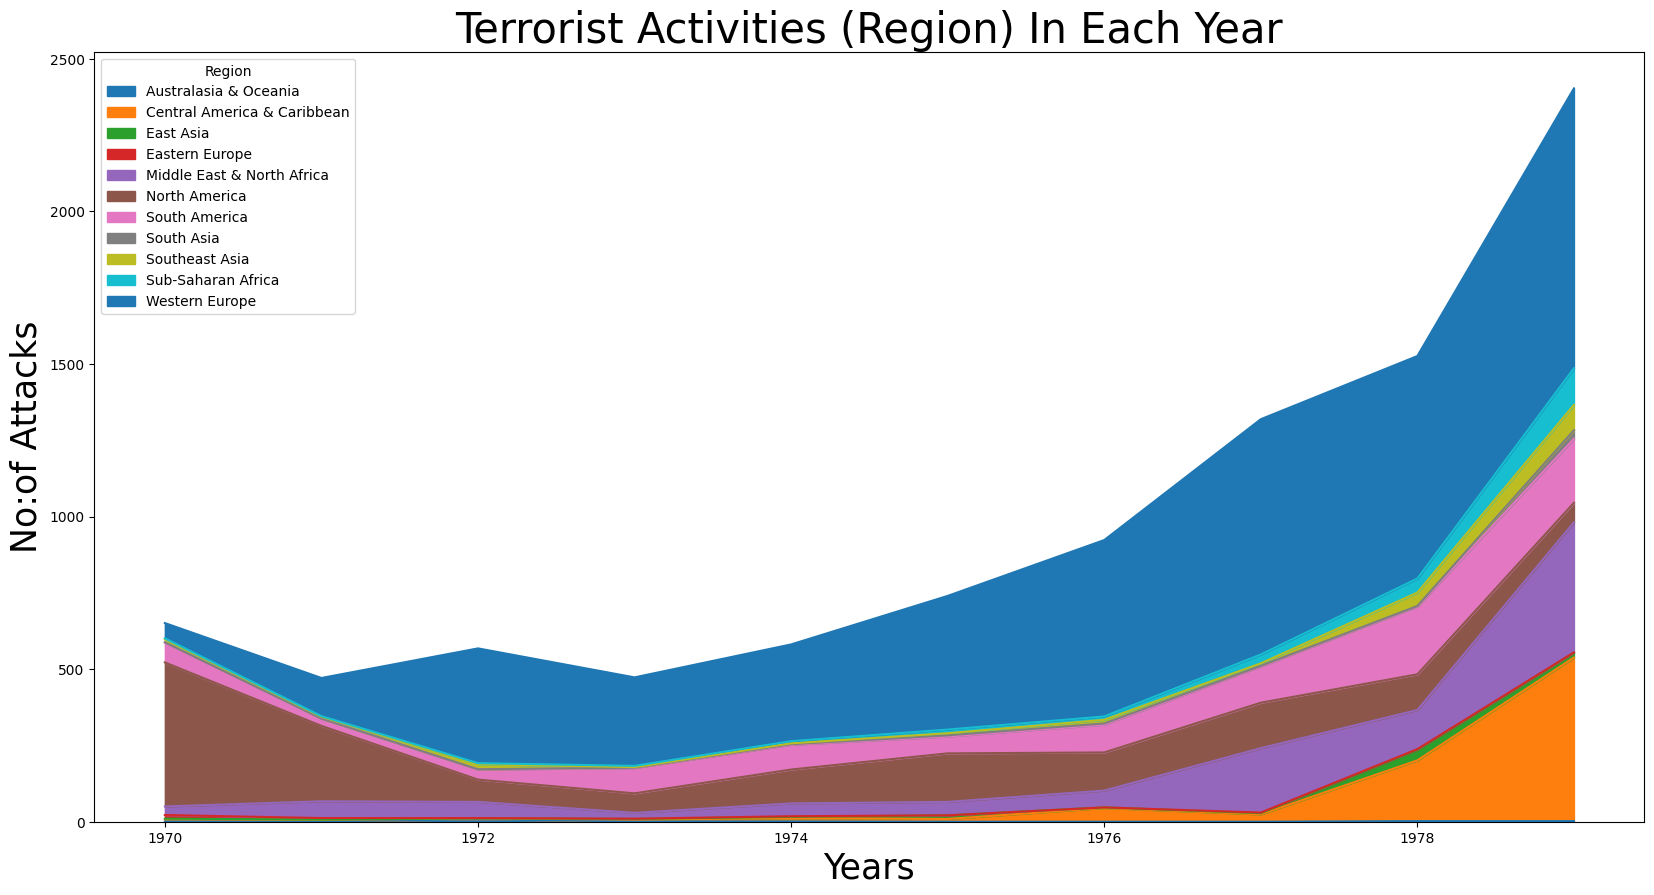

In [20]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=True,figsize=(20,10))
plt.ylabel('No:of Attacks',fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.title('Terrorist Activities (Region) In Each Year',fontsize=30)
plt.show()

In [21]:
attack = data.Country.value_counts()[:10]
attack

United Kingdom    1599
United States     1460
Italy              992
Spain              890
Turkey             475
France             464
Colombia           404
El Salvador        387
Argentina          326
Nicaragua          286
Name: Country, dtype: int64

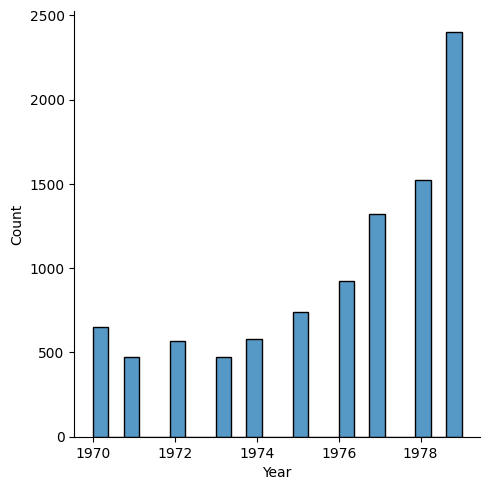

In [22]:
sns.displot(data=data, x="Year", kind="hist",multiple="stack")

<Axes: >

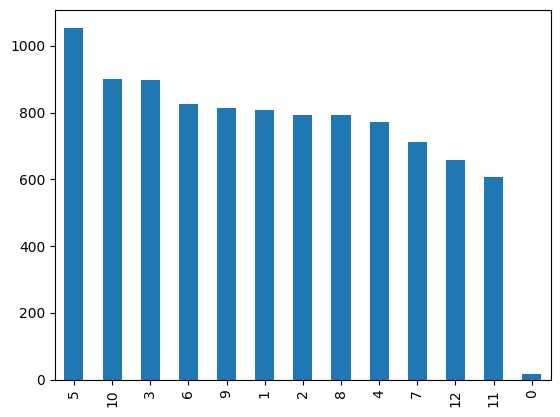

In [23]:
data['Month'].value_counts().plot(kind='bar')


In [24]:
data.Group.value_counts()[1:10]

Irish Republican Army (IRA)                    983
Basque Fatherland and Freedom (ETA)            424
Protestant extremists                          197
Sandinista National Liberation Front (FSLN)    197
Ulster Volunteer Force (UVF)                   170
Left-Wing Militants                            169
Palestinians                                   149
Corsican National Liberation Front (FLNC)      149
Red Brigades                                   142
Name: Group, dtype: int64

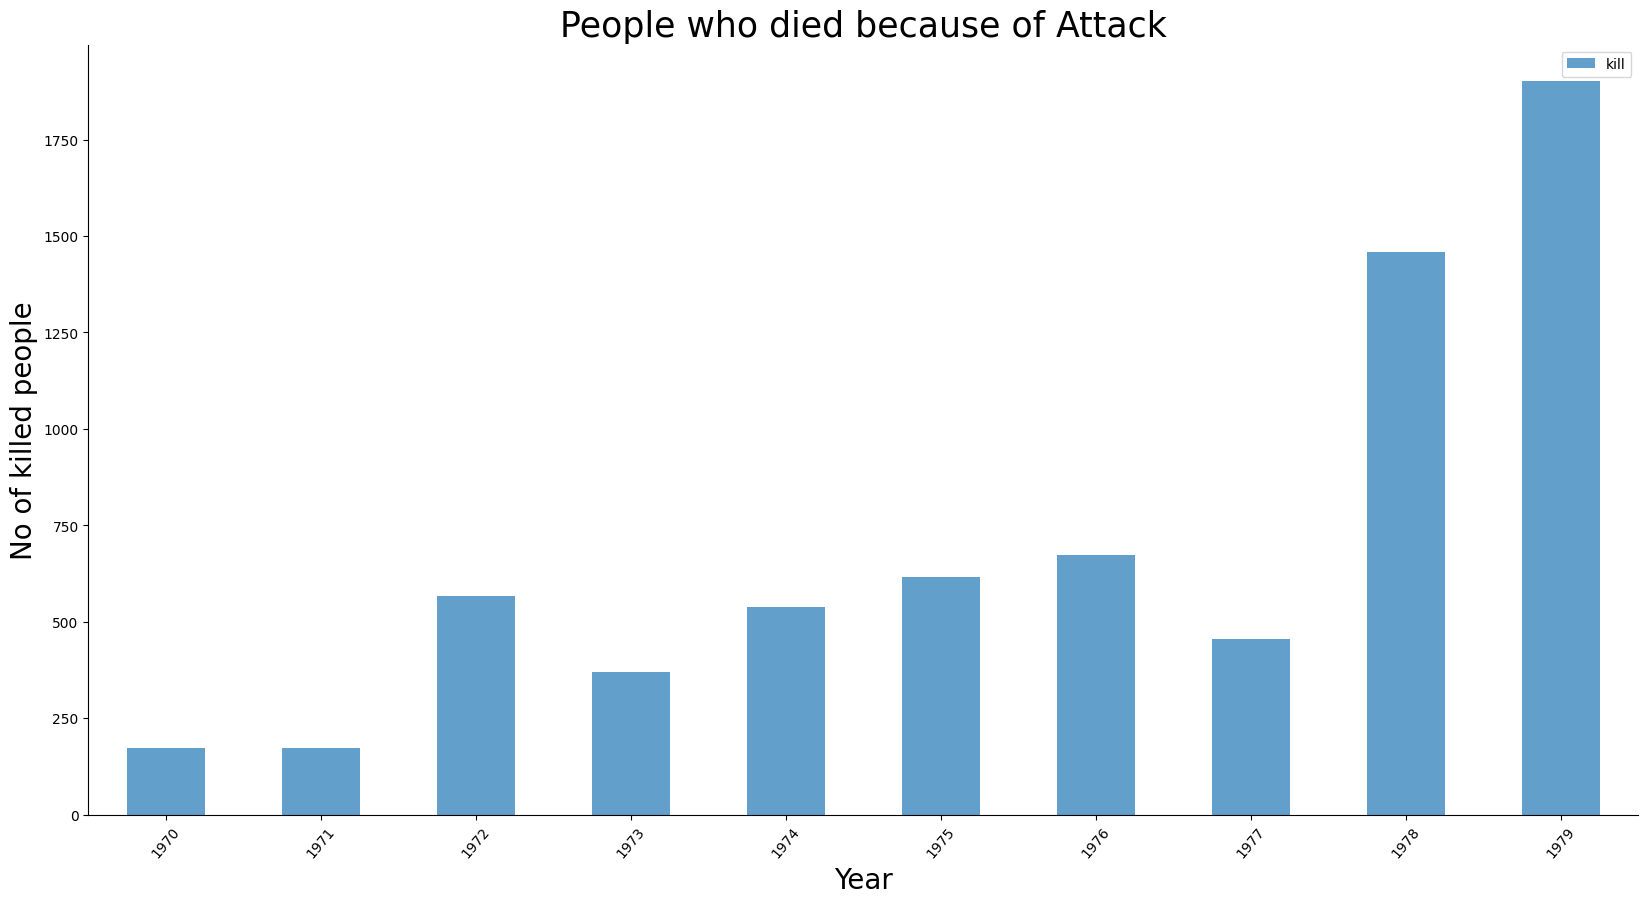

In [25]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People who died because of Attack",fontsize=25)
plt.ylabel("No of killed people",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

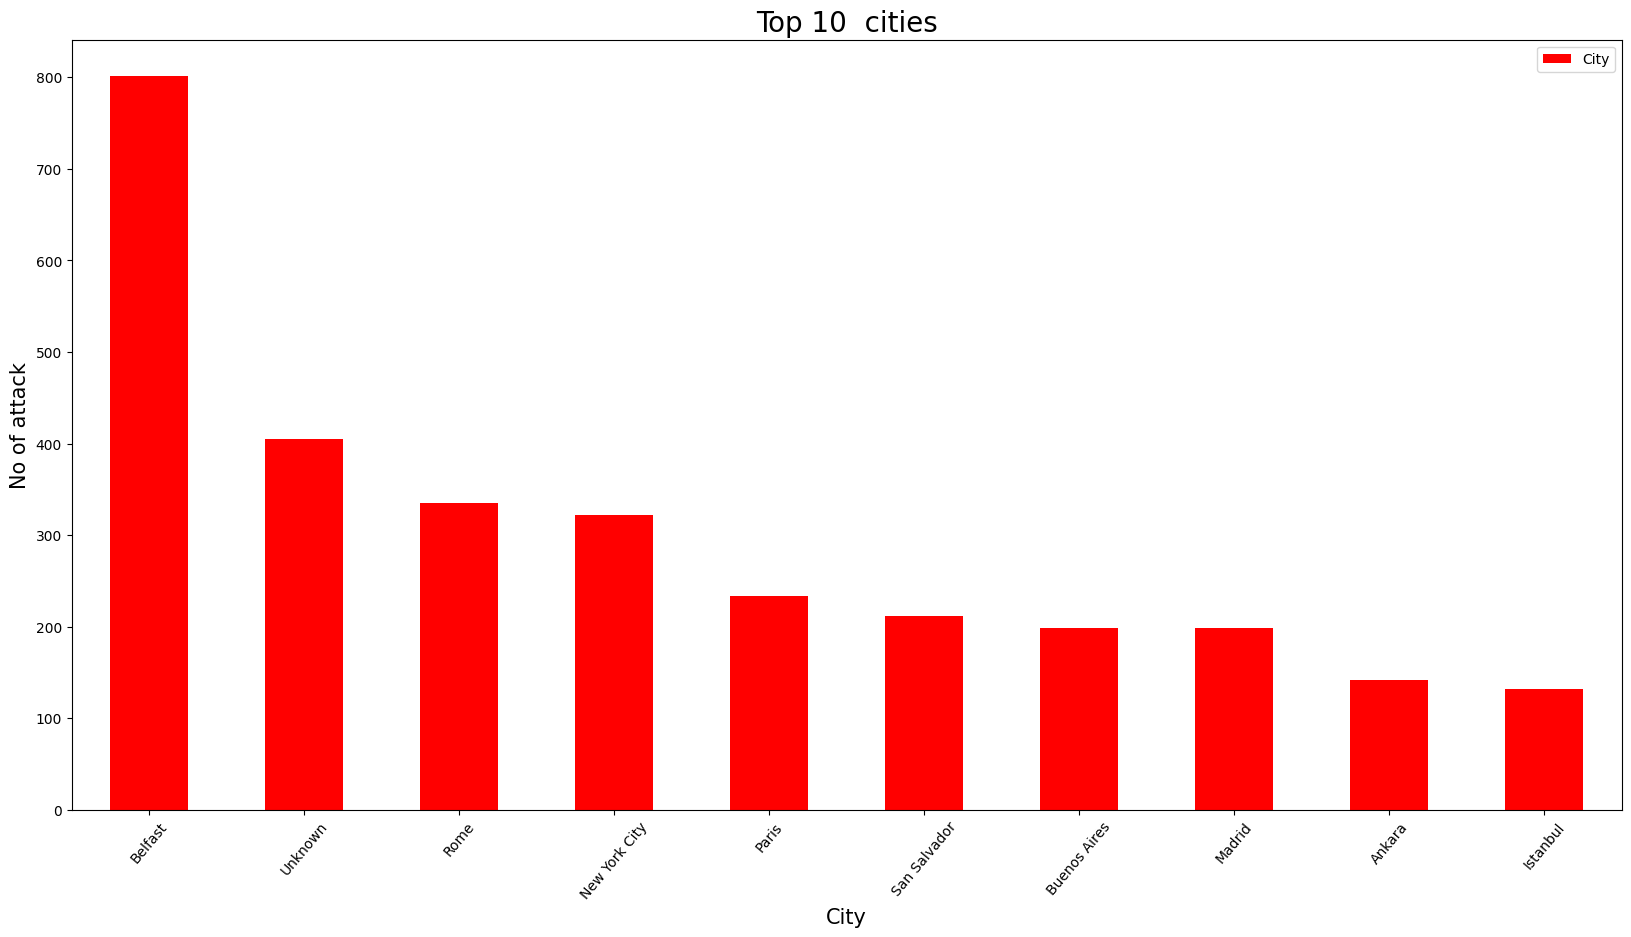

In [26]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("No of attack",fontsize=15)
plt.title("Top 10  cities",fontsize=20)
plt.show()

<Axes: >

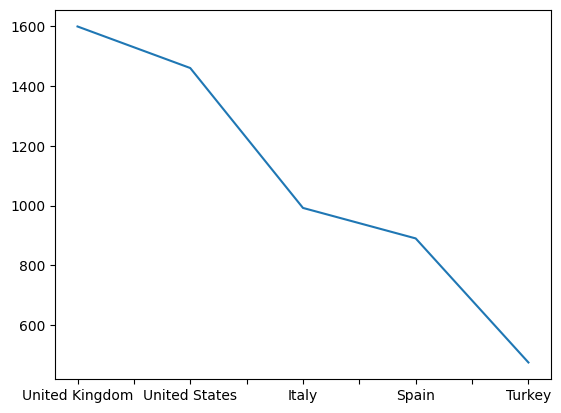

In [27]:
data['Country'].value_counts().head().plot(kind='line')

Top 5 countries with most attack happened

* Iraq
* Pakistan
* Afghanistan
* India
* Colombia

In [28]:
data['Country'].value_counts().head()

United Kingdom    1599
United States     1460
Italy              992
Spain              890
Turkey             475
Name: Country, dtype: int64

<Axes: >

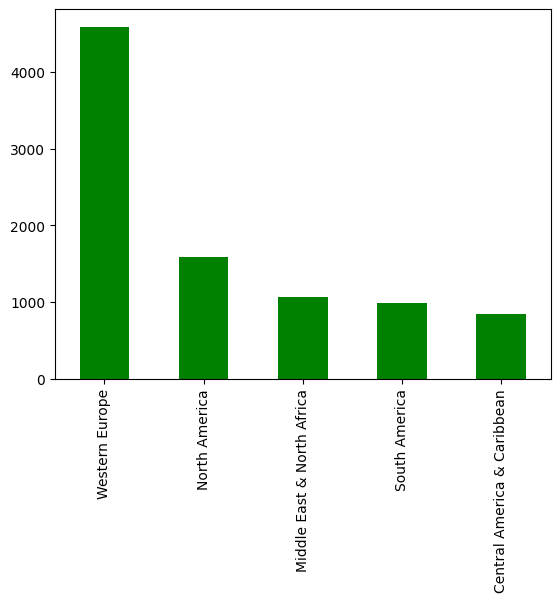

In [29]:
data['Region'].value_counts().head().plot(kind='bar',color='green')

Top 5 regions with most attack happened

* **Middle East & North Africa
* South Asia
* South America
* Sub-Saharan Africa
* Western Europe**

In [30]:

data['Region'].value_counts().head()

Western Europe                 4591
North America                  1581
Middle East & North Africa     1061
South America                   983
Central America & Caribbean     845
Name: Region, dtype: int64

In [31]:
data['Month'].value_counts().head()


5     1055
10     901
3      897
6      826
9      815
Name: Month, dtype: int64

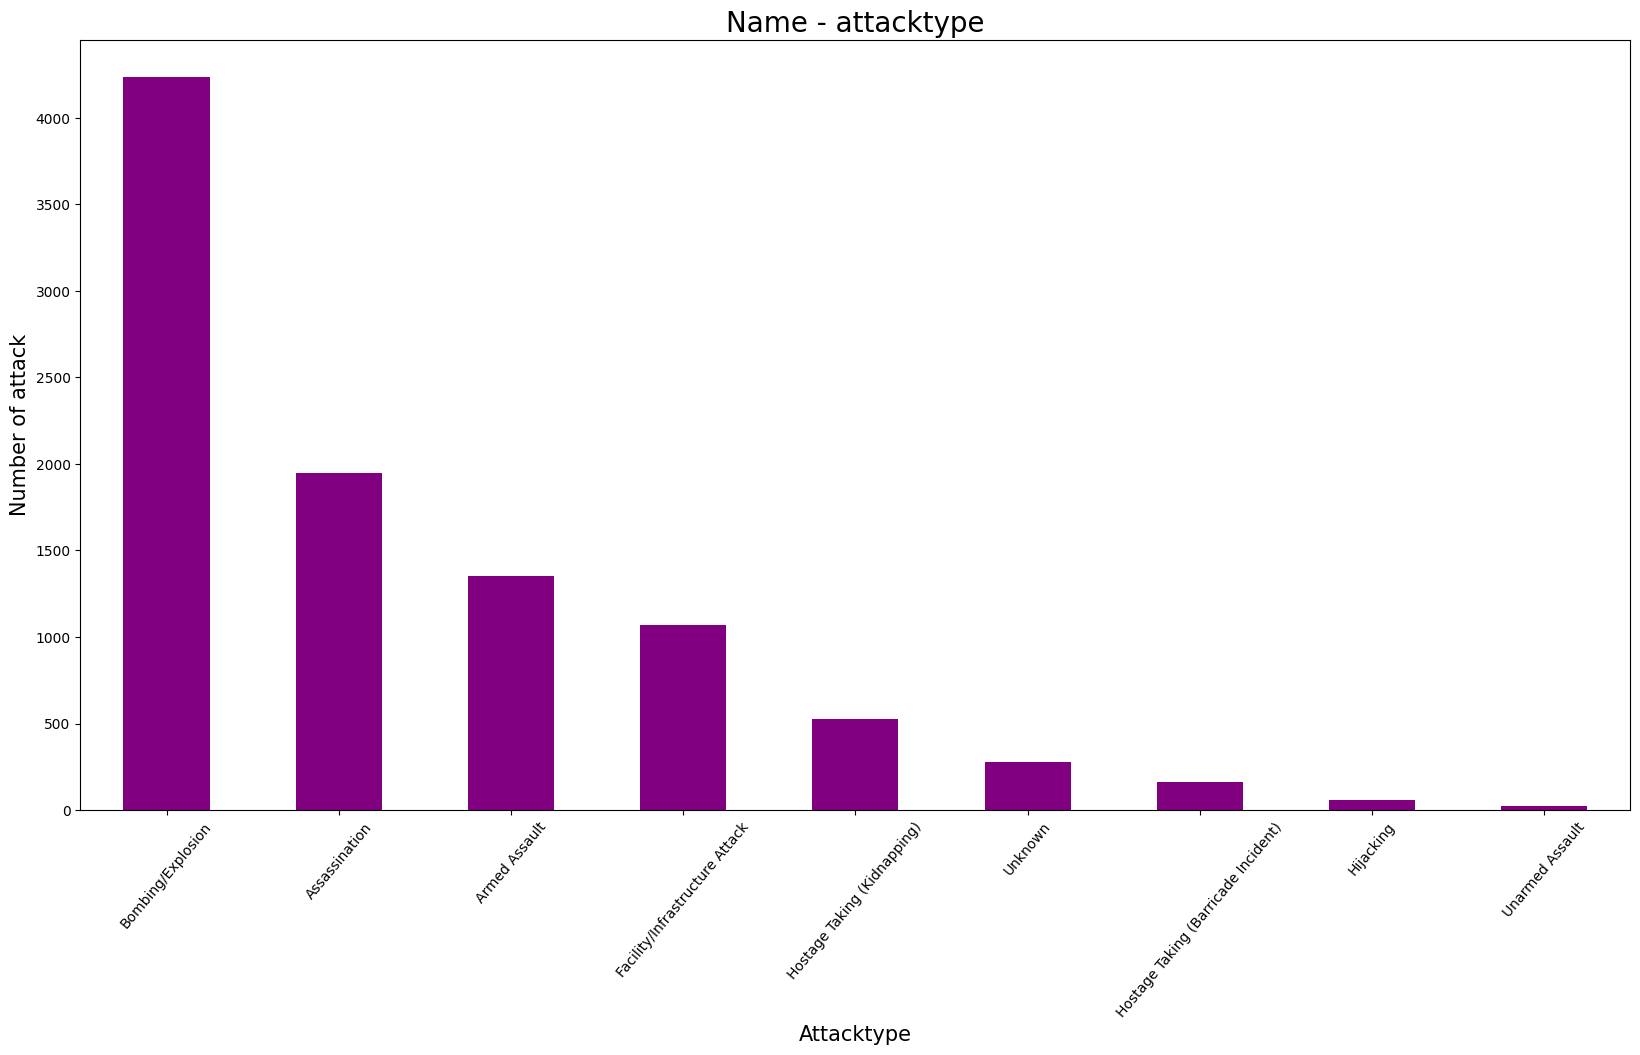

In [32]:

data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='purple')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name - attacktype",fontsize=20)
plt.show()

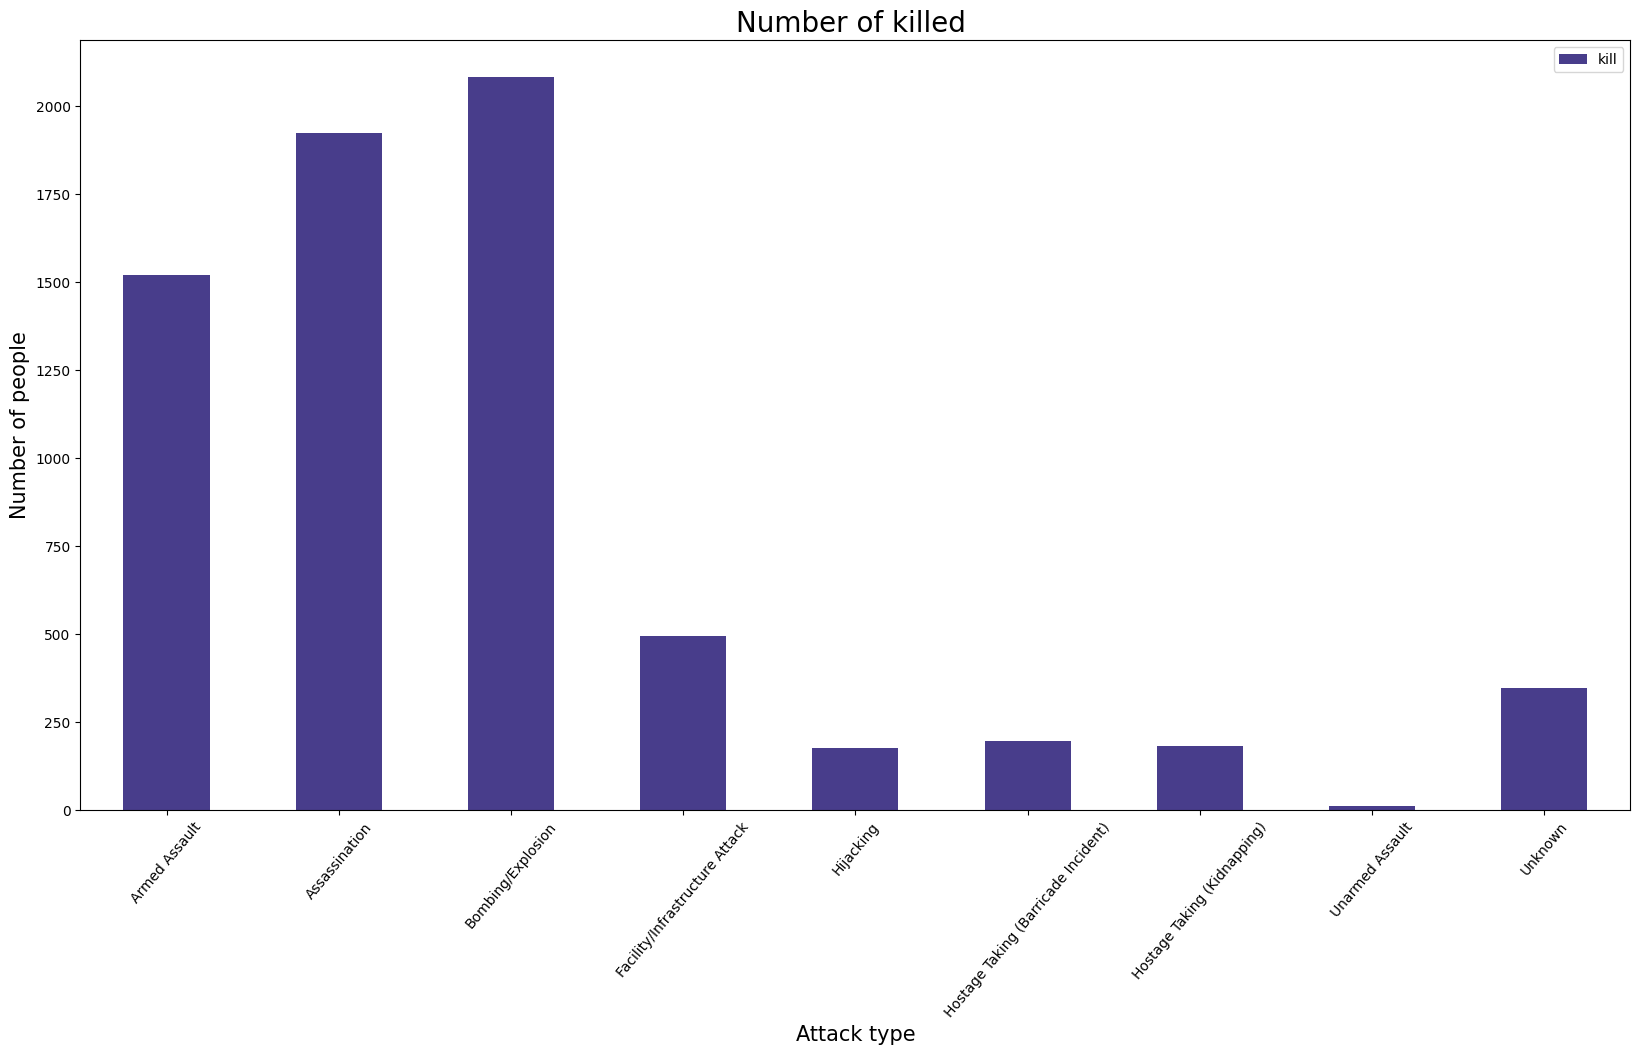

In [33]:

data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])

plt.xlabel('Attack type',fontsize=15)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xticks(rotation=50)
plt.show()

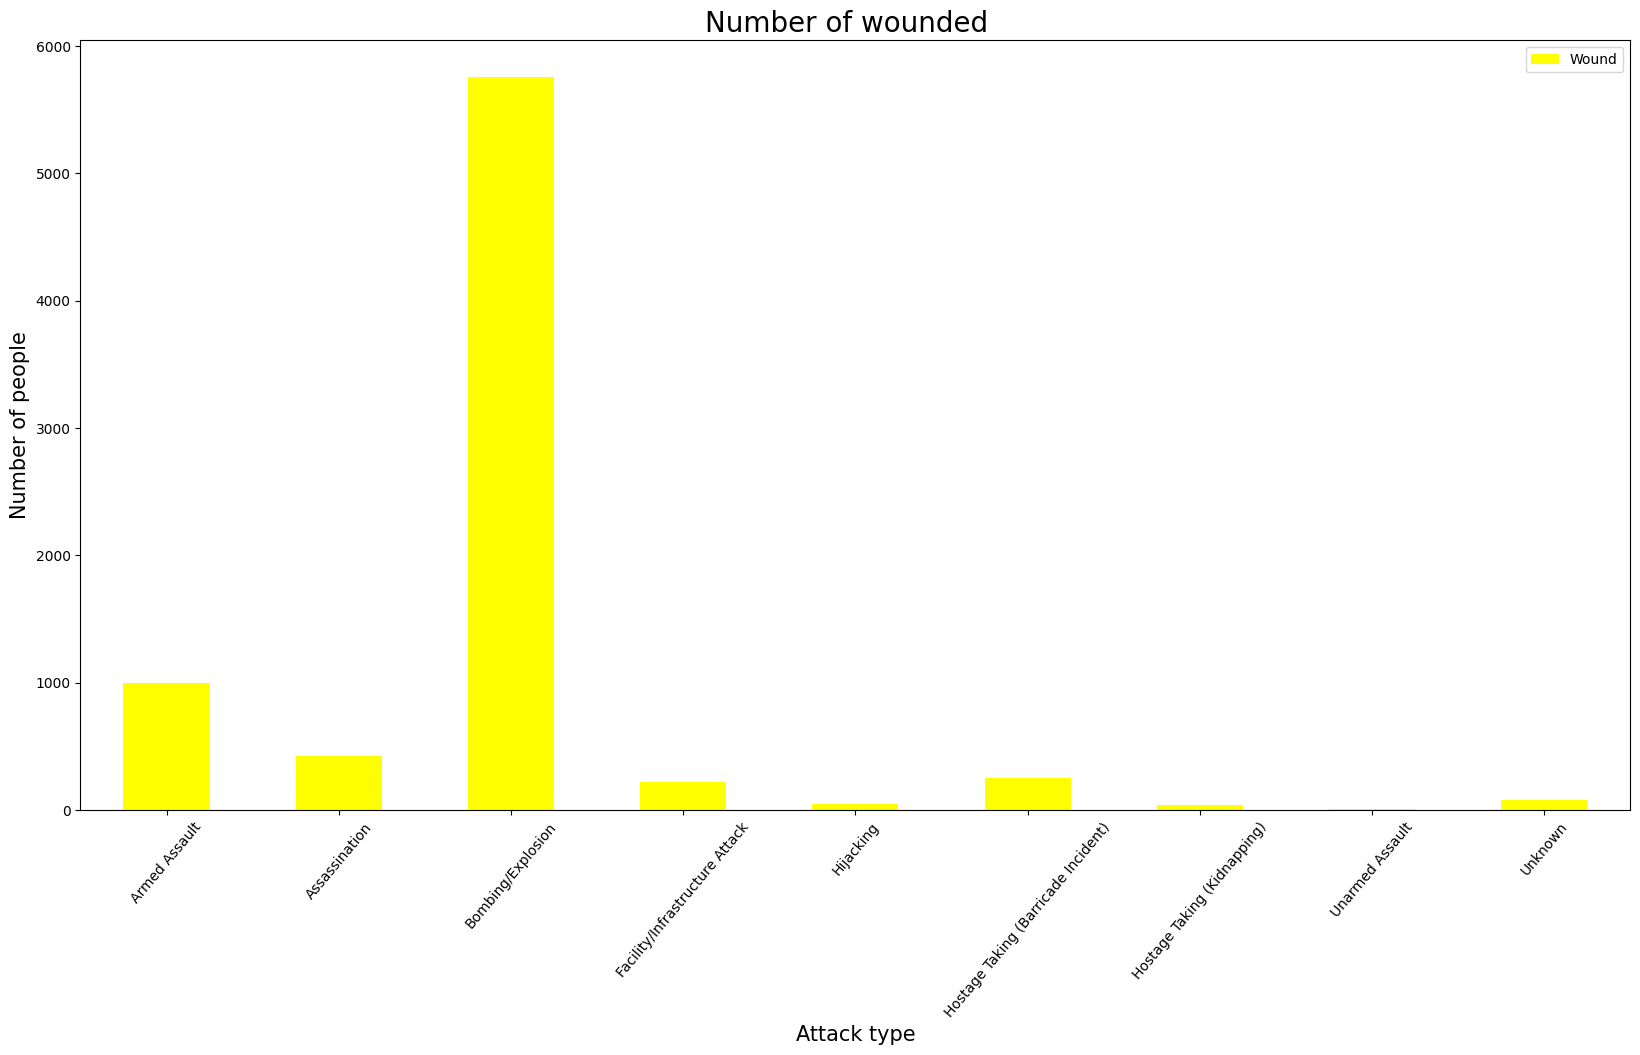

In [34]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['yellow'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

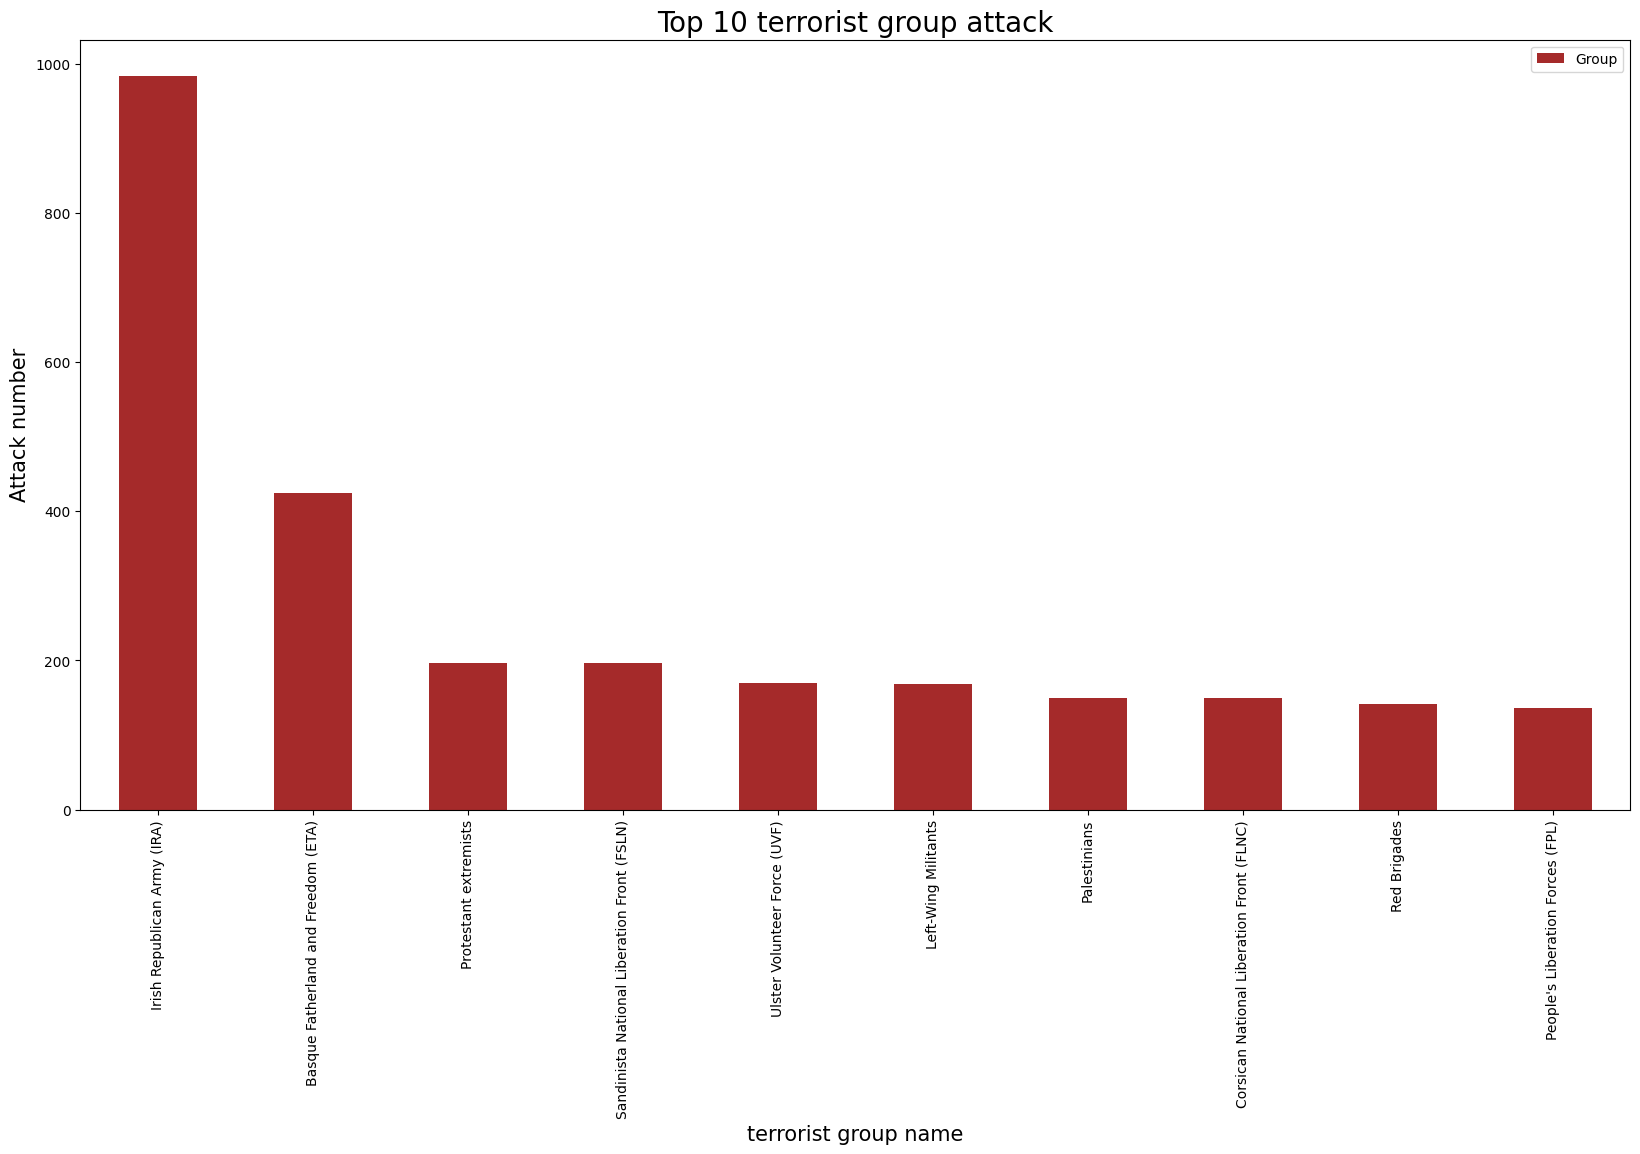

In [35]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='brown',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

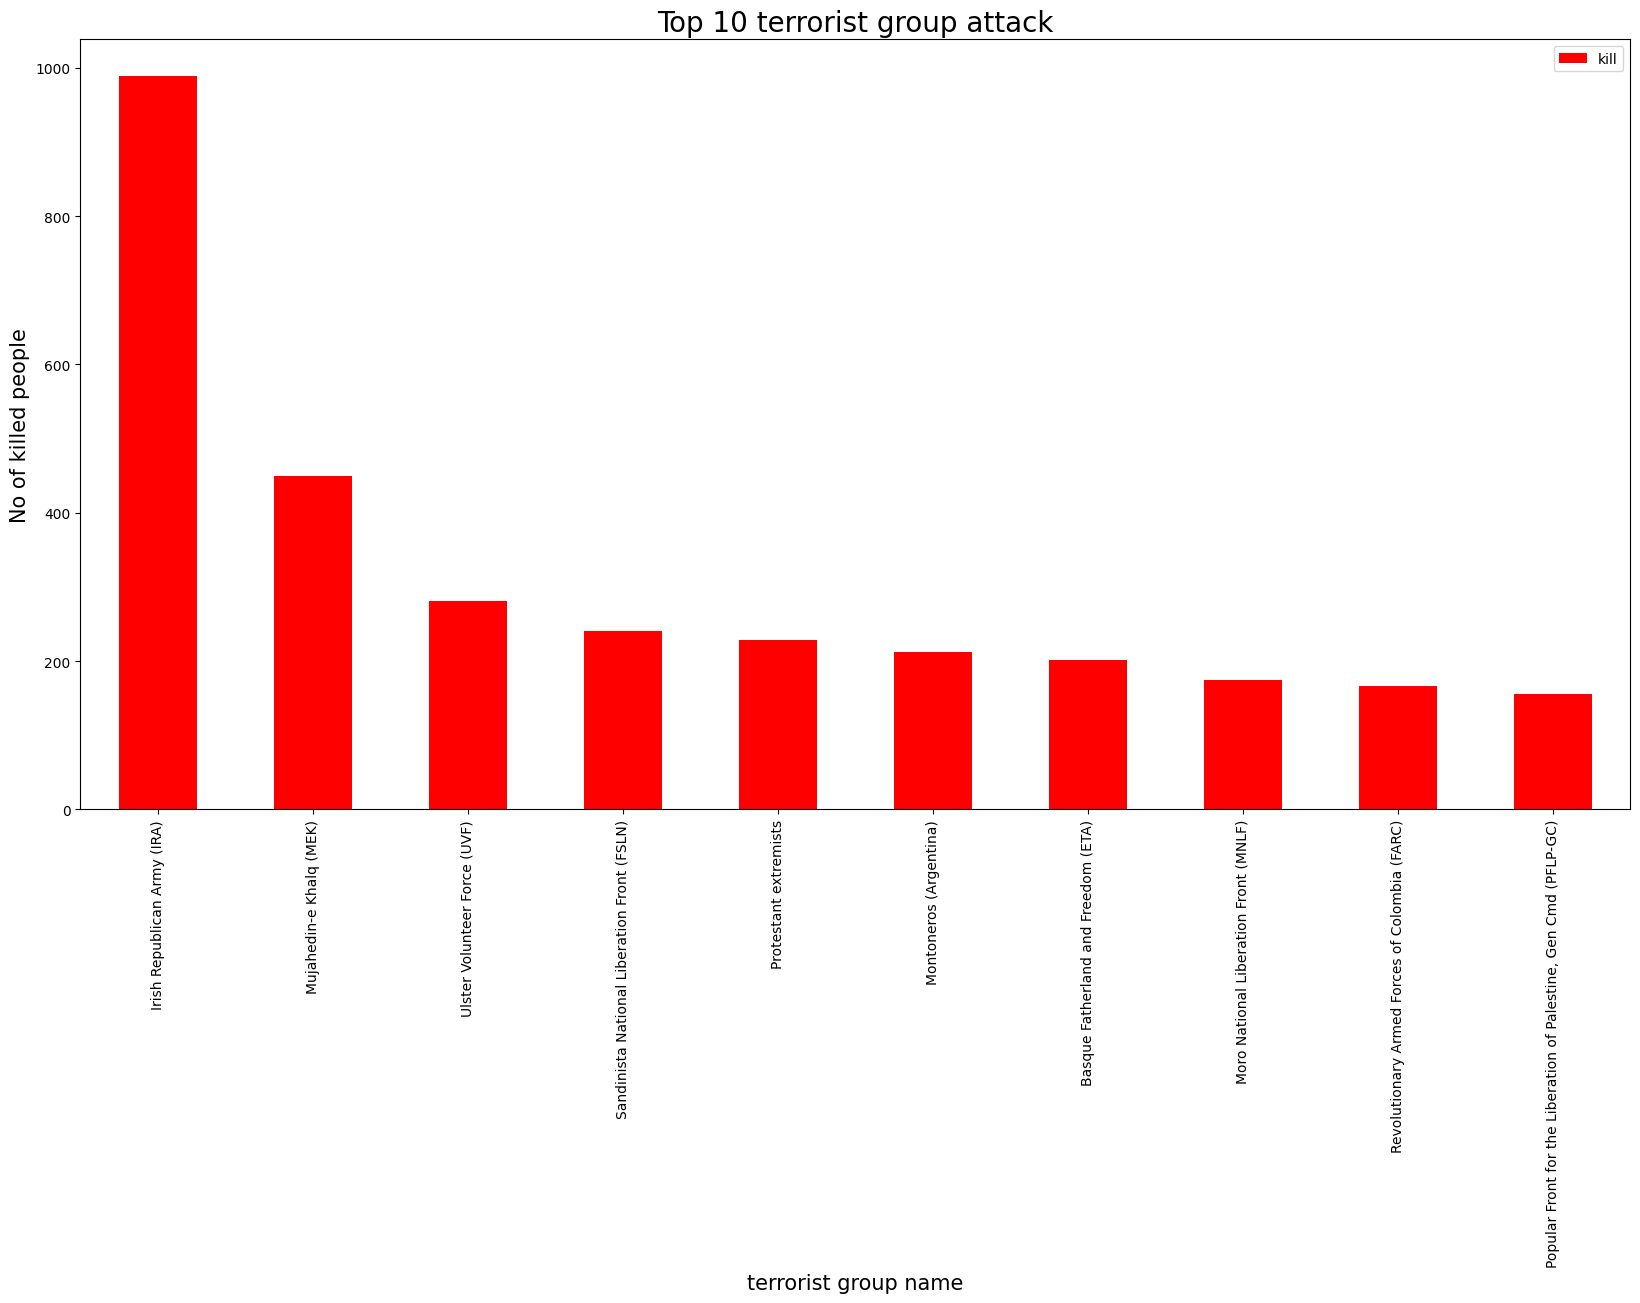

In [36]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [37]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Irish Republican Army (IRA),United Kingdom,968.0
1,Mujahedin-e Khalq (MEK),Iran,449.0
2,Ulster Volunteer Force (UVF),United Kingdom,244.0
3,Sandinista National Liberation Front (FSLN),Nicaragua,238.0
4,Protestant extremists,United Kingdom,226.0
5,Montoneros (Argentina),Argentina,212.0
6,Basque Fatherland and Freedom (ETA),Spain,200.0
7,Moro National Liberation Front (MNLF),Philippines,175.0
8,Revolutionary Armed Forces of Colombia (FARC),Colombia,167.0
9,Zimbabwe African People's Union,Rhodesia,139.0


In [38]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,1519.0,1923.0,2083.0,495.0,175.0,196.0,181.0,11.0,346.0


In [39]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 6929


In [40]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia
kill,53.0,0.0,0.0,19.0,328.0,3.0,9.0,0.0,0.0,73.0,...,1746.0,179.0,4.0,2.0,11.0,44.0,0.0,2.0,1.0,5.0


In [41]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,1519.0,1923.0,2083.0,495.0,175.0,196.0,181.0,11.0,346.0


In [42]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [43]:
attacks_by_country_region = data.groupby(['Country', 'Region']).size().reset_index(name='Total_Attacks_Count')

# Find the row with the maximum total number of attacks
max_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmax()]
min_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmin()]

print("Country with the maximum attacks:", max_attacks_row['Country'])
print("Region with the maximum attacks:", max_attacks_row['Region'])
print("Region with the minimum attacks:", min_attacks_row['Region'])
print("Total number of attacks in that region:", max_attacks_row['Total_Attacks_Count'])

Country with the maximum attacks: United Kingdom
Region with the maximum attacks: Western Europe
Region with the minimum attacks: Western Europe
Total number of attacks in that region: 1599


CONCLUDING RESULTS FOUND

Month with most attackes - MAY
Most attacking group- TALIBAN
Most Attack Types: Bombing/Explosion
Country with the most attacks: Iraq
Year with the most attacks: 2014

THANK YOU!